In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
import pickle 


In [4]:

penguin_df = pd.read_csv('penguins.csv') 
penguin_df.dropna(inplace=True) 
output = penguin_df['species'] 
features = penguin_df[['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']] 
features = pd.get_dummies(features) 
output, uniques = pd.factorize(output) 

In [5]:
x_train, x_test, y_train, y_test = train_test_split(features, 
output, test_size=.8) 

rfc = RandomForestClassifier(random_state=15) 
rfc.fit(x_train, y_train) 
y_pred = rfc.predict(x_test) 
score = accuracy_score(y_pred, y_test) 

print('Our accuracy score for this model is {}'.format(score)) 

Our accuracy score for this model is 0.9887640449438202


In [6]:

rf_pickle = open('random_forest_penguin.pickle', 'wb') 
pickle.dump(rfc, rf_pickle) 
rf_pickle.close() 
output_pickle = open('output_penguin.pickle', 'wb') 
pickle.dump(uniques, output_pickle) 
output_pickle.close() 

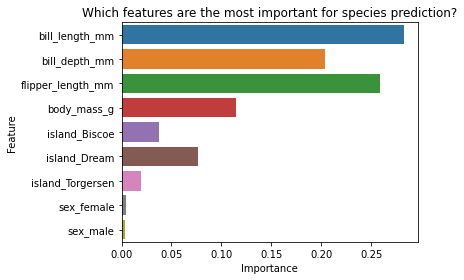

In [7]:

fig, ax = plt.subplots() 

ax = sns.barplot(x=rfc.feature_importances_, y=features.columns) 
plt.title('Which features are the most important for species prediction?') 
plt.xlabel('Importance') 
plt.ylabel('Feature') 
plt.tight_layout() 
fig.savefig('feature_importance.png') 